# Acquire and Prepare Data from Web Scraping

<hr>

## Acquire

In [1]:
# import library
import pandas as pd

In [ ]:
# retrieve data from wikipedia
url = 'https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics'
data = pd.read_html(url)

In [ ]:
type(data)

In [ ]:
len(data)

In [ ]:
fundraising = data[0]

In [19]:
# read as CSV if URL not working
fundraise = pd.read_csv('data/fundraising.csv')
fundraise.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2019/2020,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
1,2018/2019,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
2,2017/2018,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
3,2016/2017,PDF,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"
4,2015/2016,PDF,"$ 81,862,724","$ 65,947,465","$ 13,962,497","$ 91,782,795"


In [20]:
fundraise.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

In [16]:
fundraise.isnull().any()

Source          False
Revenue         False
Expenses        False
Asset rise      False
Total assets    False
dtype: bool

<hr>

## Prepare Data

### Data Wrangling

In [22]:
# delete source column
del fundraise['Source']

In [23]:
fundraise.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2019/2020,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
1,2018/2019,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
2,2017/2018,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
3,2016/2017,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"
4,2015/2016,"$ 81,862,724","$ 65,947,465","$ 13,962,497","$ 91,782,795"


In [24]:
# convert year column to numeric
fundraise['Year'] = fundraise['Year'].str[-4:]
fundraise['Year'] = pd.to_numeric(fundraise['Year'])
fundraise.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2020,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
1,2019,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
2,2018,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
3,2017,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"
4,2016,"$ 81,862,724","$ 65,947,465","$ 13,962,497","$ 91,782,795"


**Set year as Index**

In [27]:
# set year as Index
# fundraise.set_index('Year', inplace=True)
fundraise.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2020,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2019,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
2018,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
2017,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"
2016,"$ 81,862,724","$ 65,947,465","$ 13,962,497","$ 91,782,795"


In [28]:
fundraise.sort_index(inplace=True)
fundraise.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2004,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
2005,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"
2006,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216"
2007,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282"
2008,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168"


**Converting remaining colomns to Numeric**

In [29]:
fundraise.columns

Index(['Revenue', 'Expenses', 'Asset rise', 'Total assets'], dtype='object')

In [36]:
# revenue
# N.B: long way of doing it 
fundraise["Revenue"] = fundraise["Revenue"].str[2:]
fundraise["Revenue"] = fundraise["Revenue"].str.replace(',','')
fundraise["Revenue"] = pd.to_numeric(fundraise["Revenue"])
# expenses
fundraise["Expenses"] = fundraise["Expenses"].str[2:]
fundraise["Expenses"] = fundraise["Expenses"].str.replace(',','')
fundraise["Expenses"] = pd.to_numeric(fundraise["Expenses"])
# asset rise
fundraise["Asset rise"] = fundraise["Asset rise"].str[2:]
fundraise["Asset rise"] = fundraise["Asset rise"].str.replace(',','')
fundraise["Asset rise"] = pd.to_numeric(fundraise["Asset rise"])
# total assets
fundraise["Total assets"] = fundraise["Total assets"].str[2:]
fundraise["Total assets"] = fundraise["Total assets"].str.replace(',','')
fundraise["Total assets"] = pd.to_numeric(fundraise["Total assets"])

In [41]:
# you can combine the method as on
# fundraise['Revenue'].pd.to_numeric(fundraise['Revenue'].str[2:].str.replace(',',''))

`fundraise['Revenue'].pd.to_numeric(fundraise['Revenue'].str[2:].str.replace(',',''))`

In [37]:
fundraise.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2004,129,23463,56666,56666
2005,9088,177670,211418,268084
2006,508039,791907,736132,1004216
2007,734909,2077843,654066,1658282
2008,32981,3540724,3519886,5178168


In [38]:
fundraise.dtypes

Revenue         int64
Expenses        int64
Asset rise      int64
Total assets    int64
dtype: object

<hr>

## Visualize Data

<AxesSubplot:xlabel='Year'>

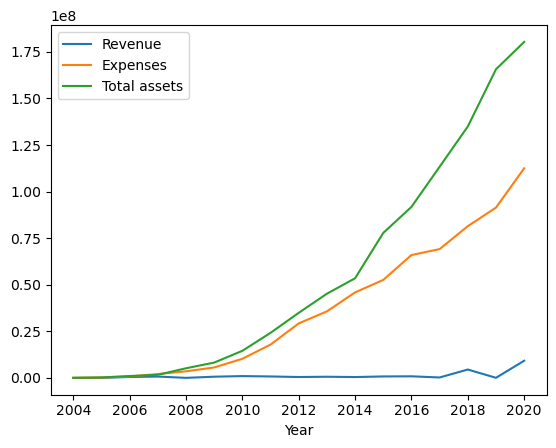

In [42]:
fundraise[['Revenue', 'Expenses', 'Total assets']].plot()

<AxesSubplot:xlabel='Year'>

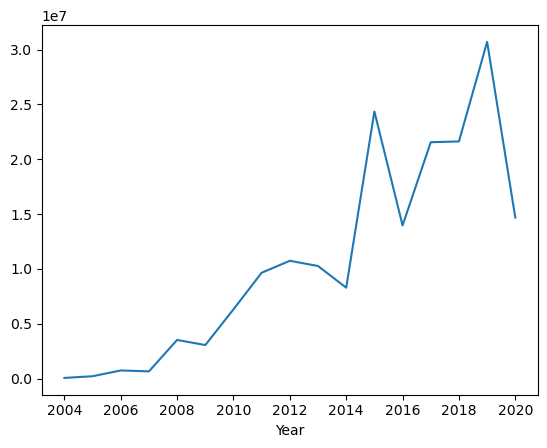

In [47]:
fundraise['Asset rise'].plot()